In [1]:
import pennylane as qml

Matplotlib is building the font cache; this may take a moment.


In [2]:
def qfunc():
    qml.PauliX(0)
    qml.Hadamard(0)
    return qml.state()


In [3]:
dev = qml.device("default.qubit", wires=1)

In [4]:
qn=qml.QNode(qfunc, dev)

In [5]:
qml.draw(qn)()

'0: ──X──H─┤  State'

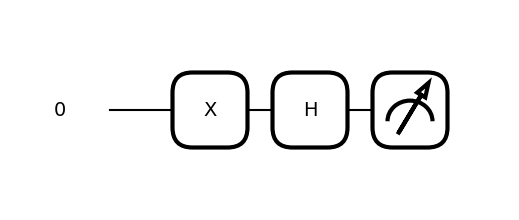

In [7]:
fig,ax=qml.draw_mpl(qn)()

In [8]:
sv = qn()
sv

tensor([ 0.70710678+0.j, -0.70710678+0.j], requires_grad=True)

In [14]:
@qml.qnode(dev)
def qfunc():
    qml.PauliX(0)
    qml.Hadamard(0)
    return qml.state()


In [15]:
qfunc()

tensor([ 0.70710678+0.j, -0.70710678+0.j], requires_grad=True)

In [16]:
@qml.qnode(dev)
def qfunc():
    qml.PauliX(0)
    qml.Hadamard(0)
    return qml.probs()

qfunc()


tensor([0.5, 0.5], requires_grad=True)

In [18]:
qml.matrix(qfunc)()

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [20]:
def circuit():
    qml.PauliX(0)
    qml.Hadamard(0)
    
@qml.qnode(dev)
def qn_sv():
    circuit()
    return qml.state()

qn_sv()

tensor([ 0.70710678+0.j, -0.70710678+0.j], requires_grad=True)

In [23]:
@qml.qnode(dev)
def qn_prob():
    circuit()
    return qml.probs()

qn_prob()

tensor([0.5, 0.5], requires_grad=True)

In [29]:
qml.matrix(circuit, wire_order=[0])()


array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [30]:
dev2 = qml.device("default.qubit", wires=1,shots=1000)

In [32]:
@qml.qnode(dev2)
def qn_sm():
    circuit()
    return qml.sample(wires=0)

samples =qn_sm()

In [35]:
import numpy as np
np.count_nonzero(samples==0
                 )/1000

0.487

In [38]:
@qml.qnode(dev2)
def qn_prob():
    circuit()
    return qml.probs()

qn_prob()

tensor([0.524, 0.476], requires_grad=True)

In [40]:
@qml.qnode(dev2)
def qn_sm():
    circuit()
    return qml.sample(qml.PauliZ(wires=0))

samples =qn_sm()
samples

tensor([ 1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,
         1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,
        -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,
         1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        -1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,
        -1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
        -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,
        -1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1.,
        -1.,  1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,
        -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,
        -1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,
        -1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,  1.,
        -1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,
        -1., -1., -1.,  1., -1., -1.,  1.,  1., -1.

In [41]:
@qml.qnode(dev2)
def qn_sm():
    circuit()
    return qml.sample(qml.PauliX(wires=0))

samples =qn_sm()
samples

tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1.

In [42]:
@qml.qnode(dev)
def qn_expz():
    circuit()
    return qml.expval(qml.PauliZ(wires=0))

qn_expz()

tensor(0., requires_grad=True)

In [43]:
@qml.qnode(dev2)
def qn_expz():
    circuit()
    return qml.expval(qml.PauliZ(wires=0))

qn_expz()

tensor(-0.026, requires_grad=True)

In [45]:
@qml.qnode(dev2)
def qn_expx():
    circuit()
    return qml.expval(qml.PauliX(wires=0))

qn_expx()

tensor(-1., requires_grad=True)

In [47]:
def circuit2():
    
    qml.Hadamard(0)
    qml.CNOT([0,1])
    
dev3 = qml.device("default.qubit", wires=2)
@qml.qnode(dev3)
def qn2():
    circuit2()
    return qml.state()


qn2()   

tensor([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j], requires_grad=True)

In [48]:
qml.draw(qn2)()

'0: ──H─╭●─┤  State\n1: ────╰X─┤  State'

In [51]:
@qml.qnode(dev3)
def qn2_exp():
    circuit2()
    return qml.expval(qml.PauliZ(wires=0) @ qml.PauliX(wires=1))
qn2_exp()

tensor(0., requires_grad=True)

In [52]:
def circuit3(theta):
    qml.RX(theta,0)
    qml.CNOT([0,1])
    
@qml.qnode(dev3)
def qn3(theta):
    circuit3(theta)
    return qml.state()

qn3(np.pi/2)
    

tensor([0.70710678+0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        -0.70710678j], requires_grad=True)

In [53]:
qml.draw(qn3)(np.pi/2)

'0: ──RX(1.57)─╭●─┤  State\n1: ───────────╰X─┤  State'